#Data Pre-Processing

In [5]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
 #setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


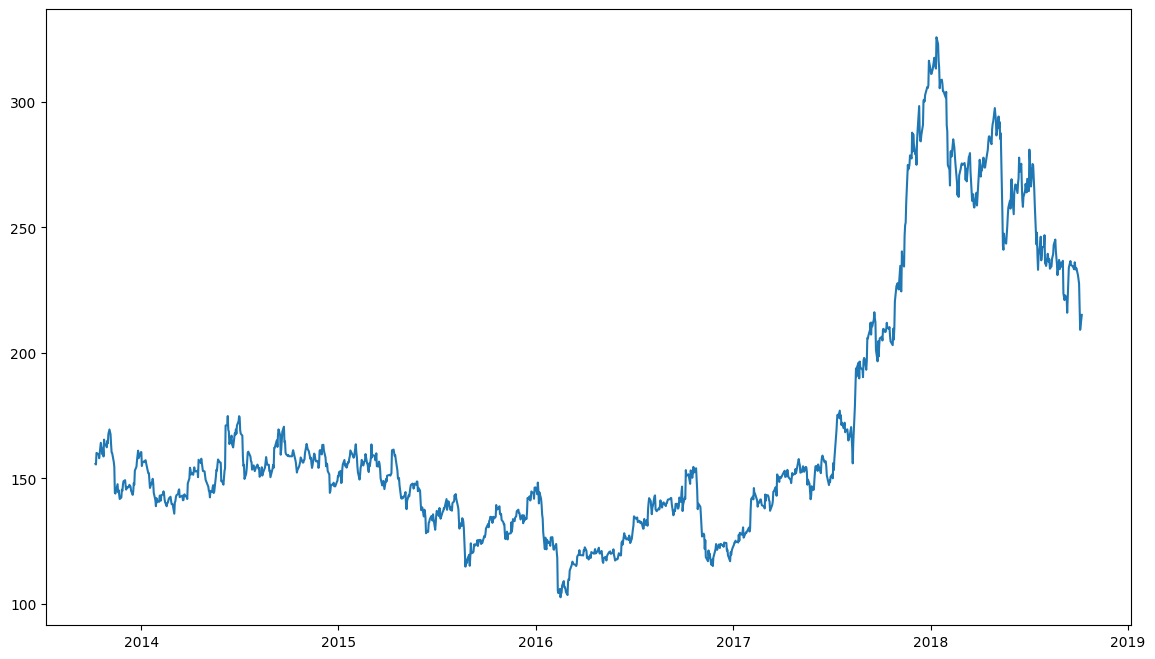

In [8]:
#plot
plt.figure(figsize=(14,8))
plt.plot(df['Close'], label='Close Price history')

##1.Moving Average Prediction

In [12]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [13]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]


In [14]:
new_data

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [15]:
train = new_data[:987]
valid = new_data[987:]

##Predictions

In [16]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [17]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.51415465984348


##Graphical Representation of Predicted Values

<ipython-input-18-51ea2c681073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-18-51ea2c681073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


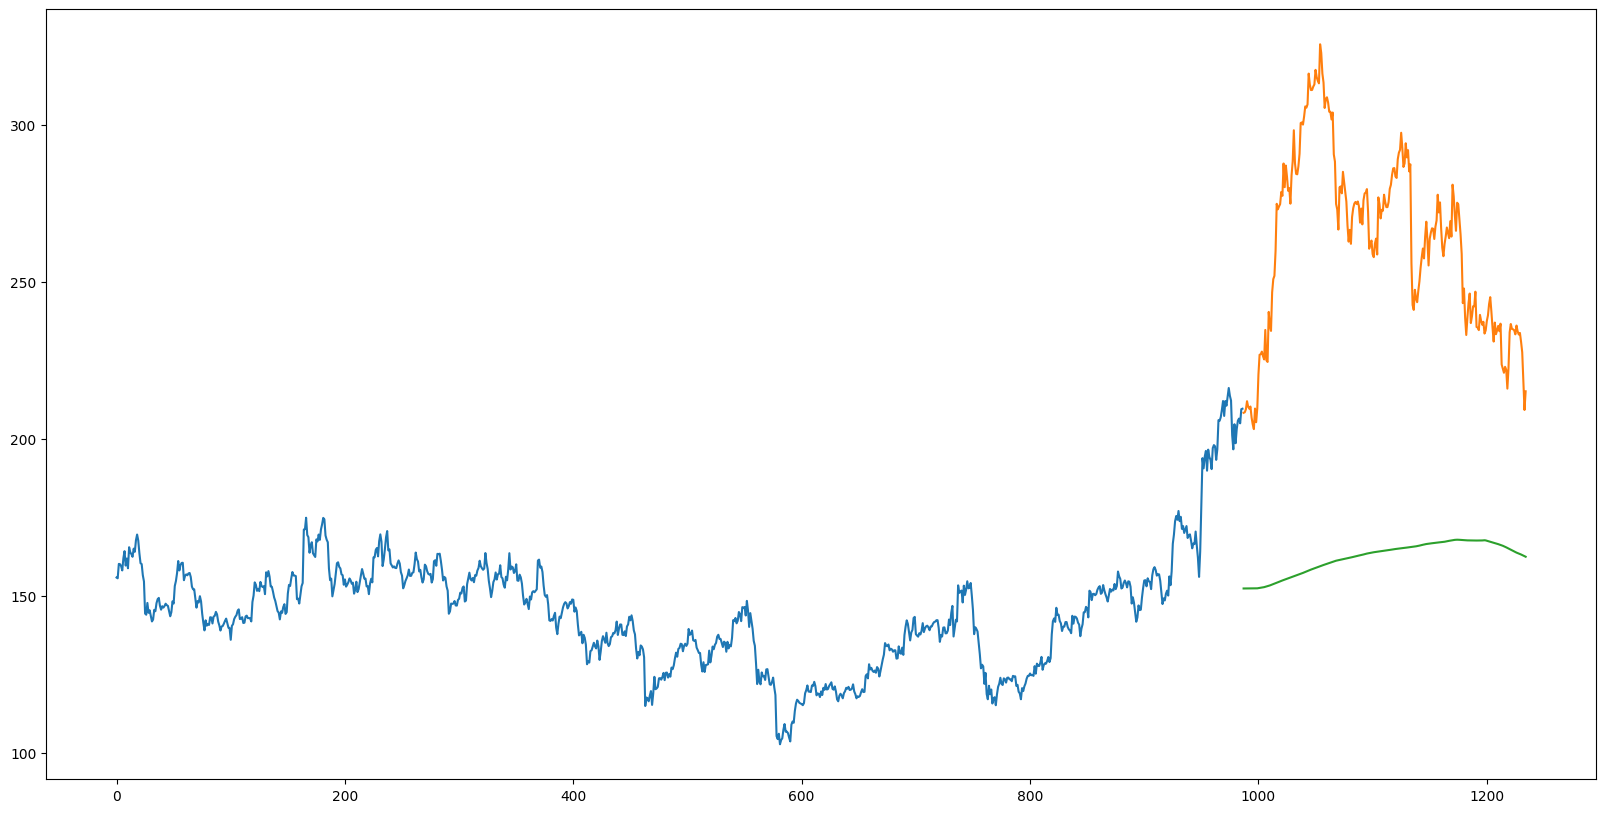

In [18]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


The RMSE value is close to 105 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

#2.Linear Regression

In [27]:
#creating a separate dataset
new_data1 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data1['Date'][i] = data['Date'][i]
    new_data1['Close'][i] = data['Close'][i]

In [28]:
new_data1

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [29]:
#create features
from fastai.tabular.all import  add_datepart
add_datepart(new_data1, 'Date')
new_data1.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [30]:
new_data1

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,230.9,2018,10,40,1,0,274,False,True,False,True,False,False
1231,227.6,2018,10,40,3,2,276,False,False,False,False,False,False
1232,218.2,2018,10,40,4,3,277,False,False,False,False,False,False
1233,209.2,2018,10,40,5,4,278,False,False,False,False,False,False


In [32]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [33]:
new_data1['mon_fri'] = 0
for i in range(0,len(new_data1)):
    if (new_data1['Dayofweek'][i] == 0 or new_data1['Dayofweek'][i] == 4):
        new_data1['mon_fri'][i] = 1
    else:
        new_data1['mon_fri'][i] = 0

In [34]:
new_data1

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,230.9,2018,10,40,1,0,274,False,True,False,True,False,False,1
1231,227.6,2018,10,40,3,2,276,False,False,False,False,False,False,0
1232,218.2,2018,10,40,4,3,277,False,False,False,False,False,False,0
1233,209.2,2018,10,40,5,4,278,False,False,False,False,False,False,1


In [35]:
#split into train_1 and validation
train_1 = new_data1[:987]
valid_1 = new_data1[987:]

x_train_1 = train_1.drop('Close', axis=1)
y_train_1 = train_1['Close']
x_valid_1 = valid_1.drop('Close', axis=1)
y_valid_1 = valid_1['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_1,y_train_1)

LinearRegression()

In [36]:
#make predictions and find the rmse
preds1 = model.predict(x_valid_1)
rms_1=np.sqrt(np.mean(np.power((np.array(y_valid_1)-np.array(preds1)),2)))
rms_1

121.16291596522818

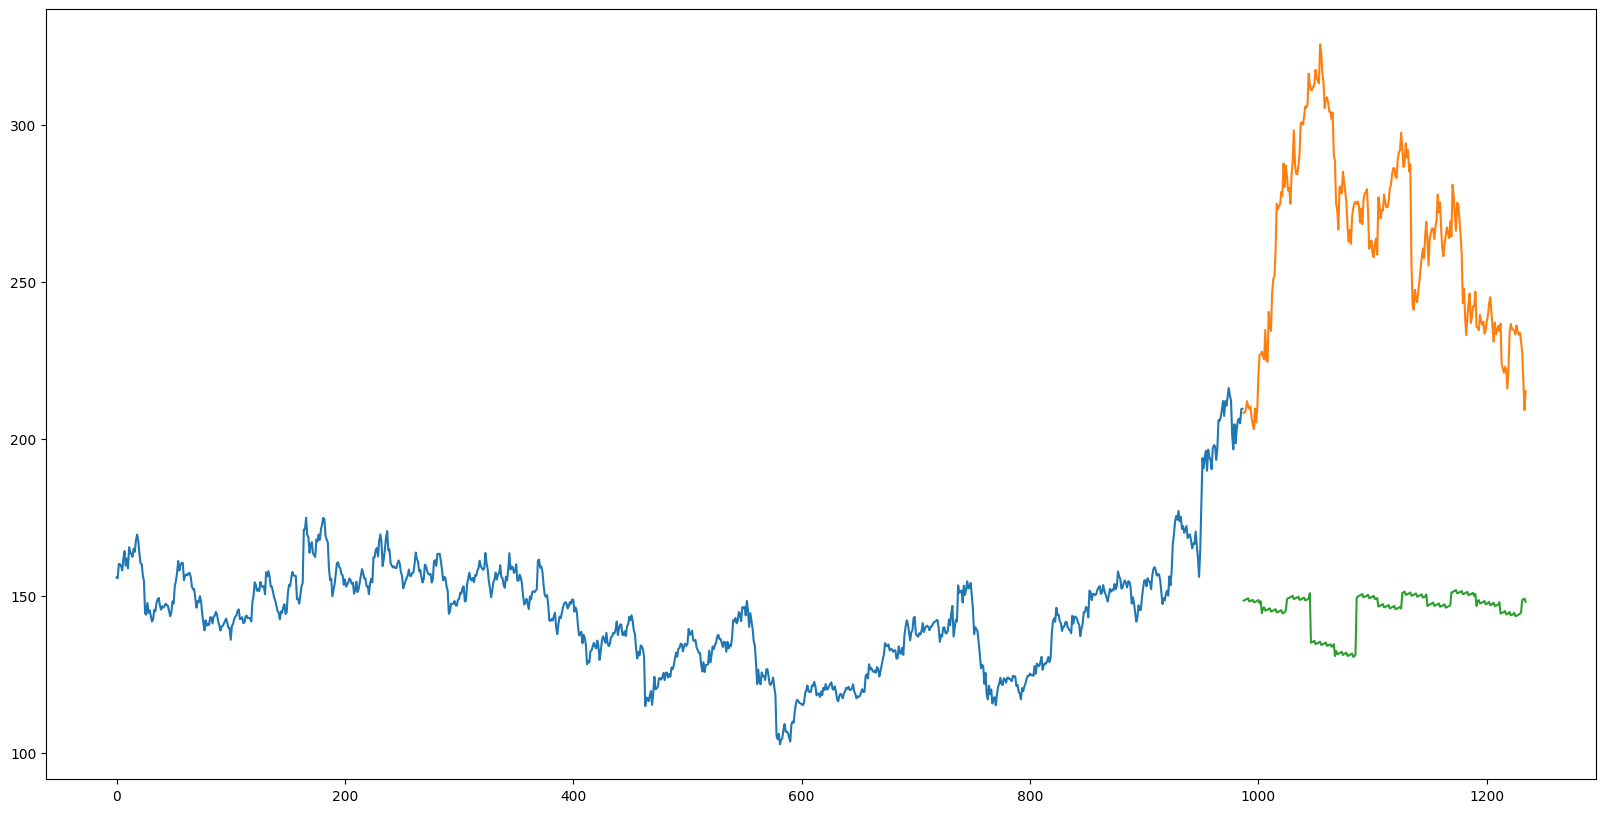

In [37]:
#plot
valid_1['Predictions'] = 0
valid_1['Predictions'] = preds1

valid_1.index = new_data1[987:].index
train_1.index = new_data1[:987].index

plt.plot(train_1['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

##3.K-Nearest Neighbours

In [39]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [66]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train_1)
x_train_sca = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid_1)
x_valid_sca = pd.DataFrame(x_valid_scaled)

In [72]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model2 = GridSearchCV(knn, params, cv=5)

#fit the model2 and make predictions
model2.fit(x_train_sca,y_train_1)
preds3 = model2.predict(x_valid_sca)

In [74]:
#rmse
rms3=np.sqrt(np.mean(np.power((np.array(y_valid_1)-np.array(preds3)),2)))
rms3

115.17086550026721

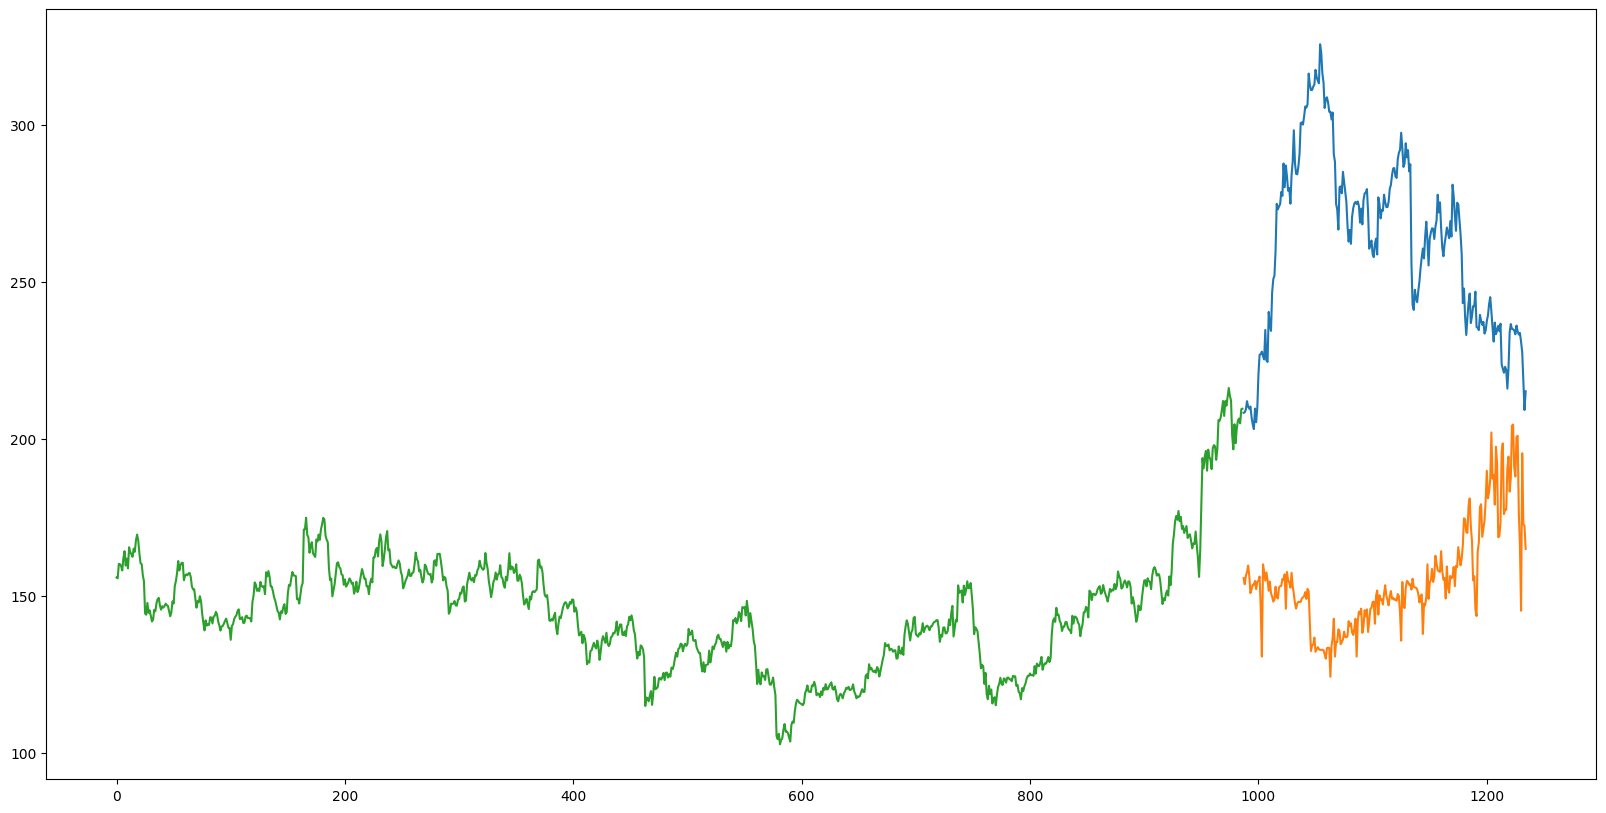

In [73]:
#plot
valid_1['Pred'] = 0
valid_1['Pred'] = preds3
plt.plot(valid_1[['Close', 'Pred']])
plt.plot(train_1['Close'])

The RMSE value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2018 since that has been the pattern for the past years. We can safely say that regression algorithms have not performed well on this datase

#4.Auto ARIMA

In [80]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


In [81]:
import pmdarima

In [83]:
from pmdarima import auto_arima

In [91]:
train = new_data[:987]
valid = new_data[987:]

training = train['Close']
validation = valid['Close']


In [94]:
training, validation

(0       155.8
 1      155.55
 2      160.15
 3      160.05
 4      159.45
         ...  
 982     205.8
 983    206.45
 984    204.95
 985    209.45
 986     209.6
 Name: Close, Length: 987, dtype: object,
 987      208.3
 988     208.45
 989      209.4
 990      212.0
 991     210.25
          ...  
 1230     230.9
 1231     227.6
 1232     218.2
 1233     209.2
 1234    215.15
 Name: Close, Length: 248, dtype: object)

In [95]:
model5= auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model5.fit(training)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.70 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.27 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=2.67 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [96]:
forecast = model5.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [97]:
forecast

,Prediction
987,212.067645
988,211.893666
989,213.446289
990,212.614441
991,213.373744
...,...
1230,334.478584
1231,337.823625
1232,336.723101
1233,339.577030


In [99]:
rms4=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms4


54.543229574071674

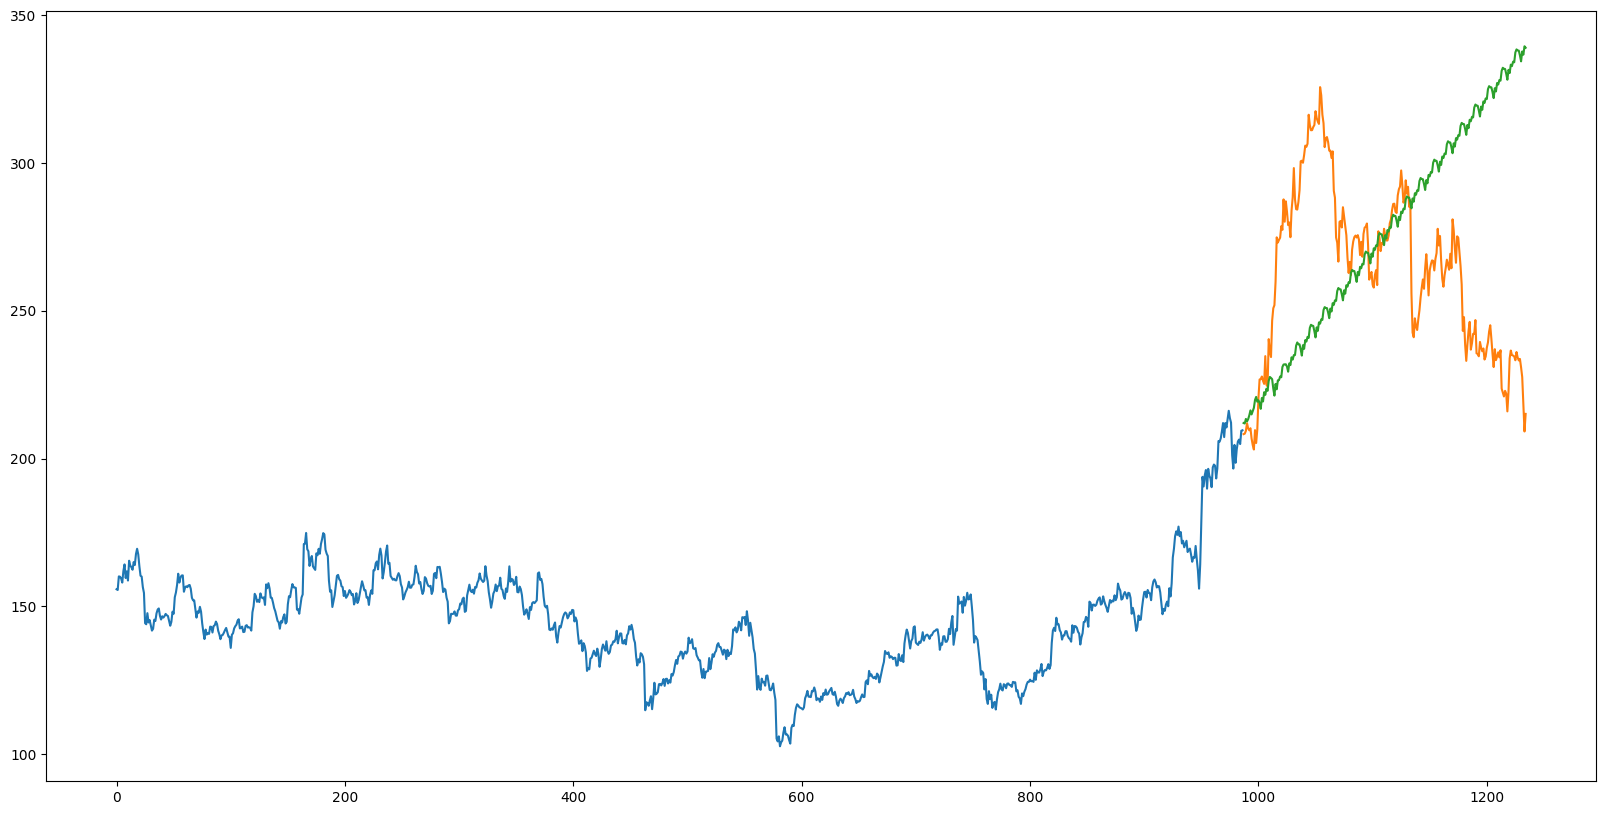

In [100]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

As we saw earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, we will implement a time series model that takes both trend and seasonality of a series into account.

#5.Prophet Model

In [108]:
!pip install prophet

In [118]:
from prophet import Prophet

In [119]:
#creating a separate dataset
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data2['Date'][i] = data['Date'][i]
    new_data2['Close'][i] = data['Close'][i]

In [120]:
new_data2['Date'] = pd.to_datetime(new_data2.Date,format='%Y-%m-%d')
new_data2.index = new_data2['Date']

In [121]:
#preparing data
new_data2.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [122]:
#train and validation
train5 = new_data2[:987]
valid5 = new_data2[987:]

In [123]:
#fit the model
model5 = Prophet()
model5.fit(train5)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpev09144s/66za6qp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpev09144s/llhb9yfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66868', 'data', 'file=/tmp/tmpev09144s/66za6qp8.json', 'init=/tmp/tmpev09144s/llhb9yfl.json', 'output', 'file=/tmp/tmpev09144s/prophet_modelukkxj7zn/prophet_model-20231206190107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:01:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:01:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [124]:
#predictions
close_prices = model5.make_future_dataframe(periods=len(valid5))
forecast2 = model5.predict(close_prices)

In [125]:
forecast_valid = forecast2['yhat'][987:]

In [126]:
rms5=np.sqrt(np.mean(np.power((np.array(valid5['y'])-np.array(forecast_valid)),2)))
rms5

57.320798699081635

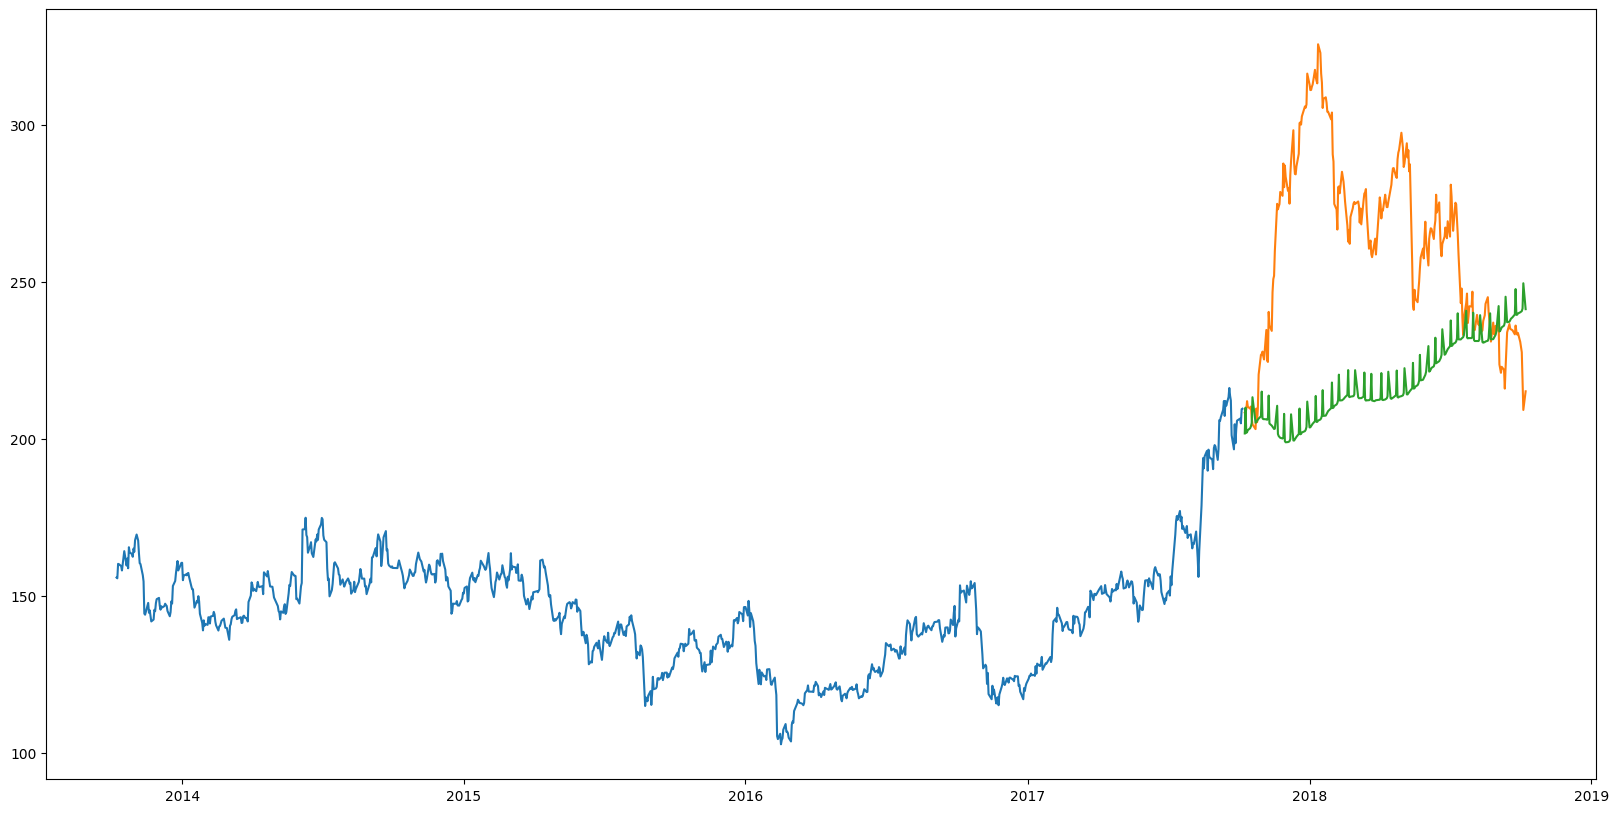

In [127]:
#plot
valid5['Predictions'] = 0
valid5['Predictions'] = forecast_valid.values

plt.plot(train5['y'])
plt.plot(valid5[['y', 'Predictions']])

Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.

As it turns out, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA, SARIMA and Prophet would not show good results for this particular problem

#6.LSTM Model

In [128]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [129]:
new_data3 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data3['Date'][i] = data['Date'][i]
    new_data3['Close'][i] = data['Close'][i]

#setting index
new_data3.index = new_data3.Date
new_data3.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset1 = new_data3.values

In [130]:
train_set= dataset1[0:987,:]
valid_set = dataset1[987:,:]

#converting dataset1 into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset1)


In [131]:
x_train6, y_train6 = [], []
for i in range(60,len(train_set)):
    x_train6.append(scaled_data[i-60:i,0])
    y_train6.append(scaled_data[i,0])
x_train6, y_train6 = np.array(x_train6), np.array(y_train6)

x_train6 = np.reshape(x_train6, (x_train6.shape[0],x_train6.shape[1],1))

In [134]:
# create and fit the LSTM network
model7 = Sequential()
model7.add(LSTM(units=50, return_sequences=True, input_shape=(x_train6.shape[1],1)))
model7.add(LSTM(units=50))
model7.add(Dense(1))

In [135]:
model7.compile(loss='mean_squared_error', optimizer='adam')
model7.fit(x_train6, y_train6, epochs=1, batch_size=1, verbose=2)

927/927 - 40s - loss: 0.0012 - 40s/epoch - 43ms/step


In [136]:
#predicting 246 values, using past 60 from the train data
inputs = new_data3[len(new_data3) - len(valid_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [137]:
x_test6 = []
for i in range(60,inputs.shape[0]):
    x_test6.append(inputs[i-60:i,0])
x_test6 = np.array(x_test6)

In [138]:
x_test6 = np.reshape(x_test6, (x_test6.shape[0],x_test6.shape[1],1))
closing_price = model7.predict(x_test6)
Closing_price = scaler.inverse_transform(closing_price)

8/8 [==============================] - 3s 39ms/step


In [140]:
rms7=np.sqrt(np.mean(np.power((valid_set-Closing_price),2)))
rms7

9.816142776457795

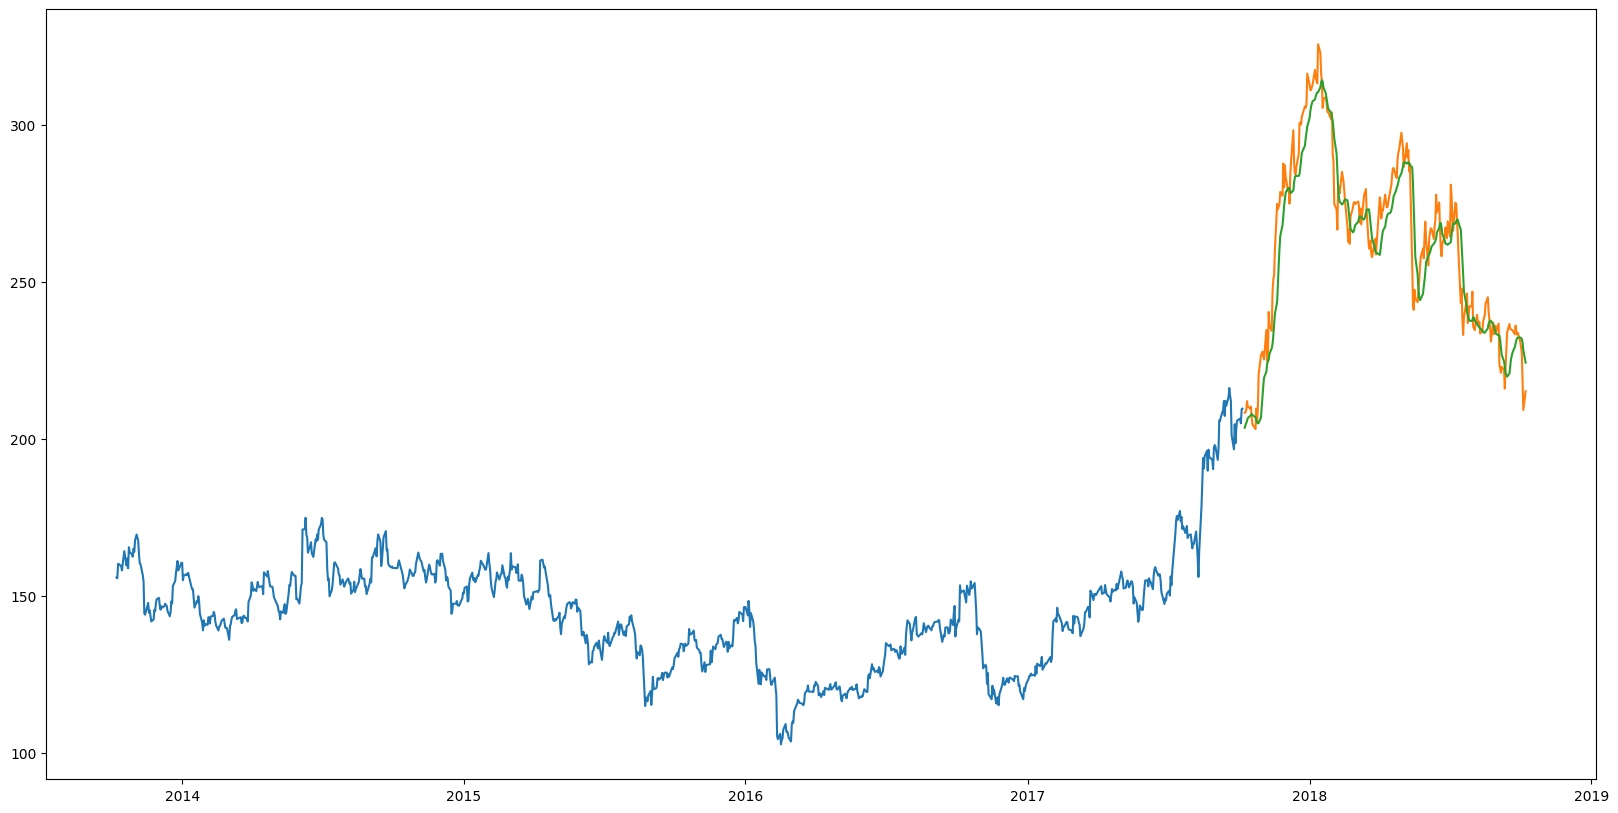

In [141]:
#for plotting
tra = new_data3[:987]
va_l = new_data3[987:]
va_l['Predictions'] = Closing_price
plt.plot(tra['Close'])
plt.plot(va_l[['Close','Predictions']])